<a href="https://colab.research.google.com/github/Madhav2204/Digital-Image-Processing-and-Pattern-Rcognition-/blob/main/P_7_Image_Registration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-07**

In [ ]:
import cv2
import numpy as np

In [ ]:
# Open the image files.
img1_color = cv2.imread("/content/drive/MyDrive/im1.jpg")  # Image to be aligned.
img2_color = cv2.imread("/content/drive/MyDrive/im2.jpg")    # Reference image.

In [ ]:
# Convert to grayscale.
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape
 

In [ ]:
# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)

In [ ]:

# Find keypoints and descriptors.
# The first arg is the image, second arg is the mask
#  (which is not required in this case).
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)

In [ ]:
# Match features between the two images.
# We create a Brute Force matcher with
# Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [ ]:
# Match the two sets of descriptors.
matches = matcher.match(d1, d2)

In [ ]:

# Sort matches on the basis of their Hamming distance.
matches.sort(key = lambda x: x.distance)

In [ ]:
# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)

In [ ]:
# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

In [ ]:
for i in range(len(matches)):
  p1[i, :] = kp1[matches[i].queryIdx].pt
  p2[i, :] = kp2[matches[i].trainIdx].pt

In [ ]:

# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

In [ ]:
# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(img1_color,homography, (width, height))

In [ ]:
# Save the output.
cv2.imwrite('output.jpg', transformed_img)

True

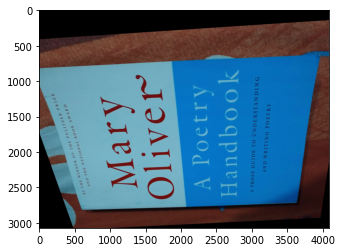

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(transformed_img)

## **Submitted By : Madhav Shrivastava**

## **Enroll no.   : 19100BTCSBS05597**